# **Árvores de Decisão**

*Prof. Dr. Orlando Junior*

Árvores de decisão são uma ferramenta no suporte à tomada de decisão que usam modelos baseados em árvores que podem ser usadas para representar e tomar decisões de maneira visual e explícita.

Os modelos de árvores representam o conhecimento no formato de árvores de decisão, que podem ser representadas por meio de grafos acíclicos direcionados. Nesses grafos, os nós representam as decisões do modelo ou o resultado esperado, enquanto que as arestas representam as alternativas de decisão.

O aprendizado de árvores de decisão é usado na estatística e na mineração de dados para a modelagem de problemas preditivos. As árvores de decisão podem ser usadas em problemas de classificação ou regressão e os seus algoritmos de aprendizagem de máquina estão entre os mais populares em razão da simplicidade e interpretabilidade das árvores.

## Classificação de Flores (Iris)

![image](https://miro.medium.com/max/1000/1*Hh53mOF4Xy4eORjLilKOwA.png)

## Bibliotecas

In [113]:
# Vamos atualizar o sklearn no Colab
!pip install -U scikit-learn

In [114]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

## Dados

In [115]:
# Carregamento dos dados
iris = load_iris()

In [116]:
# Visualização de dados
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [117]:
# Formato dos dados (150 exemplos x 4 atributos de entrada)
print(iris.data.shape)

(150, 4)


In [118]:
# Visualização dos atributos de saída
# Classes = {0, 1, 2}
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## Separação Entrada/Saída

**Entrada**

In [119]:
X = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [120]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [121]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Saída**

In [122]:
y = pd.DataFrame(data=iris.target, columns=["classe"])

In [123]:
y.head(51)

,classe
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


## Separação Treinamento/Teste

In [124]:
# houldout (70% treinamento / 30% teste)
# houldout (1/3 teste e 2/3 treinamento)
# 90% treinamento e 10% teste
# 60% treinamento e 40% teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=42)

In [144]:
print("Treinamento:", len(X_train))
print("Teste:", len(X_test))

Treinamento: 112
Teste: 38


## Treinamento / Aprendizagem

In [145]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [146]:
# Ajusta o modelo aos dados de treinamento
#dt.fit(X_train, y_train)
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

## Predição

In [147]:
X_test.iloc[0:1, :]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
73,6.1,2.8,4.7,1.2


In [148]:
y_pred = dt.predict(X_test)

In [149]:
print(y_pred)

[1 0 2 1 1 0 1 2 1 1 1 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [150]:
print(y_pred.shape)

(38,)


## Avaliação

In [151]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=[0, 1, 2])

In [152]:
cm

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  1, 11]])

In [153]:
# 0 - 1
# Melhor = mais próximo de 1
print("Acurácia do modelo: %.5f" % accuracy_score(y_test, y_pred))

Acurácia do modelo: 0.97368


## Plotagem da Árvore

In [154]:
# class 0: setosa
# class 1: versicolor
# class 2: virginica

# feature_1: sepal length (cm)
# feature_2: sepal width (cm)
# feature_3: petal length (cm)
# feature_4: petal width (cm)
print(export_text(dt, feature_names=iris.feature_names, class_names=iris.target_names))

|--- petal length (cm) <= 2.45
|   |--- class: setosa
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.65
|   |   |   |--- class: versicolor
|   |   |--- petal width (cm) >  1.65
|   |   |   |--- class: virginica
|   |--- petal length (cm) >  4.75
|   |   |--- petal length (cm) <= 5.15
|   |   |   |--- petal width (cm) <= 1.75
|   |   |   |   |--- sepal width (cm) <= 2.35
|   |   |   |   |   |--- class: virginica
|   |   |   |   |--- sepal width (cm) >  2.35
|   |   |   |   |   |--- petal length (cm) <= 5.05
|   |   |   |   |   |   |--- class: versicolor
|   |   |   |   |   |--- petal length (cm) >  5.05
|   |   |   |   |   |   |--- sepal length (cm) <= 6.15
|   |   |   |   |   |   |   |--- class: versicolor
|   |   |   |   |   |   |--- sepal length (cm) >  6.15
|   |   |   |   |   |   |   |--- class: virginica
|   |   |   |--- petal width (cm) >  1.75
|   |   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |   |--- class: virgi

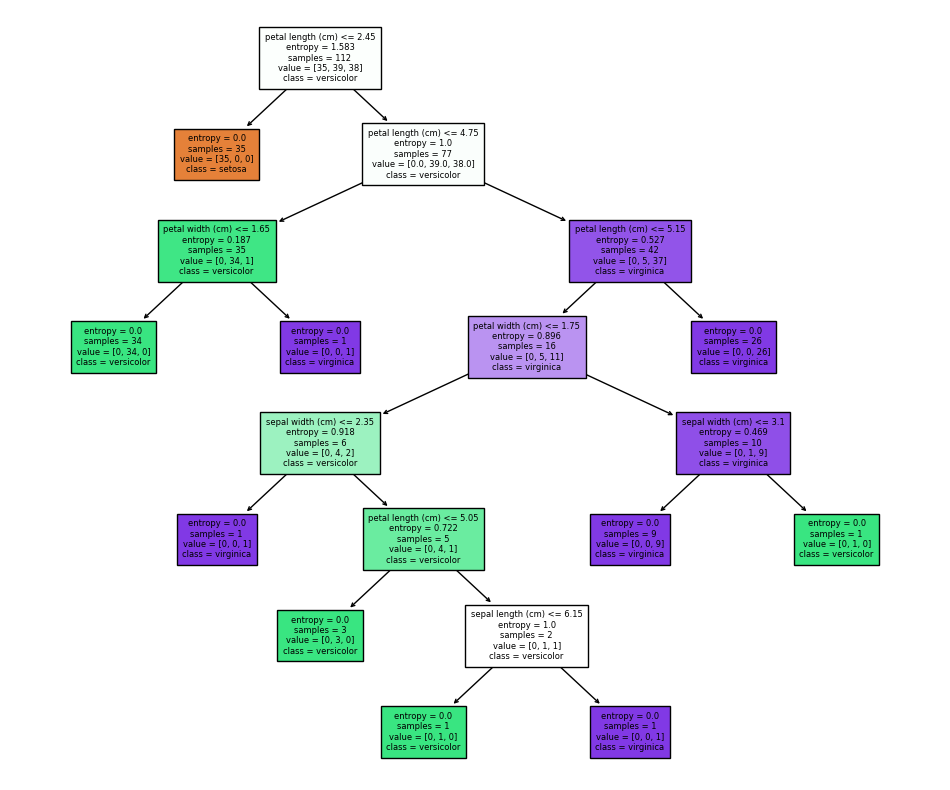

In [155]:
# Plotagem tradicional
plt.figure(figsize=(12, 10))
plot_tree(dt,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          fontsize=6,
          filled=True)
plt.show()

## Atributos Mais Relevantes do Modelo

In [ ]:
# Importância dos atributos
df = pd.DataFrame(list(zip(dt.feature_importances_, X_train.columns)))
df.sort_values(by=0, ascending=False, inplace=True)

In [ ]:
# Visualização gráfica das importâncias
y_pos = np.arange(len(X_train.columns))
plt.figure(figsize=(12,3))
plt.bar(y_pos, df.loc[:,0], color=['g', 'r', 'b', 'y'])
plt.xticks(y_pos, df.loc[:,1], rotation=45)
plt.yticks([n/100 for n in range(0, 101, 10)]) # Lista de 0.0 a 1.0
plt.show()